[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/frhack/oli_ai/blob/main/notebooks/oli_ai_porte_logiche_keras.ipynb)

In [1]:
!pip uninstall  -y oli_ai > /dev/null
!pip install --upgrade --no-cache-dir oli_ai > /dev/null


import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from oli_ai.mnist_lib import *

# AND

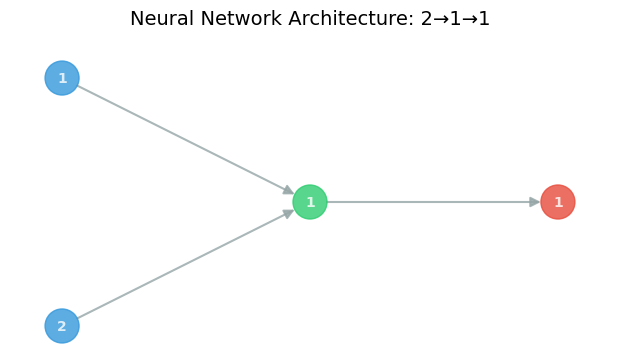

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Risultati dell'inferenza:
Input 1 | Input 2 | Output AND | Predizione | Decisione del Modello
---------------------------------------------------------------------
   0    |   0   |      0       |   0.0003   |           0
   0    |   1   |      0       |   0.0017   |           0
   1    |   0   |      0       |   0.0015   |           0
   1    |   1   |      1       |   0.9960   |           1


In [2]:

# === 1. Dati AND ===
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])
outputs = np.array([
    [0],
    [0],
    [0],
    [1]])

# === 2. Rete neurale con 2 hidden layer ===
show_nn_graph([2,1,1])
inp = Input(shape=(2,))
h1 = Dense(1, activation='tanh')(inp)        # Primo hidden layer
out = Dense(1, activation='sigmoid')(h1)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(inputs, outputs, epochs=500, verbose=0)

predictions = model.predict(inputs).ravel()
print("\nRisultati dell'inferenza:")
print("Input 1 | Input 2 | Output AND | Predizione | Decisione del Modello")
print("---------------------------------------------------------------------")
for i in range(len(inputs)):
    x1, x2 = inputs[i]
    label = int(outputs[i][0])
    pred = predictions[i]
    decision = int(round(pred))
    print(f"   {x1:.0f}    |   {x2:.0f}   |      {label}       |   {pred:.4f}   |           {decision}")




# OR

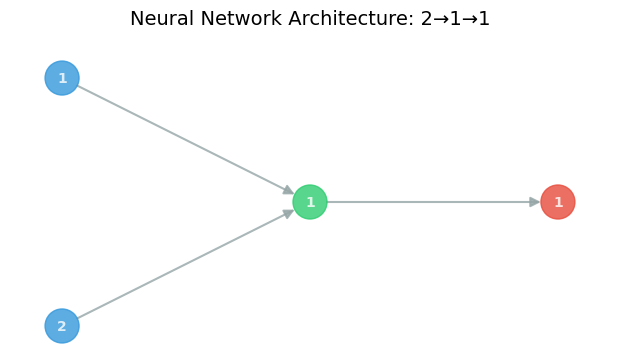

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Risultati dell'inferenza:
Input 1 | Input 2 | Output OR  | Predizione | Decisione del Modello
---------------------------------------------------------------------
   0    |   0   |      0       |   0.0039   |           0
   0    |   1   |      1       |   0.9986   |           1
   1    |   0   |      1       |   0.9986   |           1
   1    |   1   |      1       |   0.9989   |           1


In [3]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from oli_ai.mnist_lib import *

# === 1. Dati OR ===
inputs = np.array([
      [0, 0],
      [0, 1],
      [1, 0],
      [1, 1]])
outputs = np.array([
      [0],
      [1],
      [1],
      [1]])

# === 2. Rete neurale con 2 hidden layer ===
show_nn_graph([2,1,1])
inp = Input(shape=(2,))
h1 = Dense(1, activation='tanh')(inp)        # Primo hidden layer
out = Dense(1, activation='sigmoid')(h1)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(inputs, outputs, epochs=500, verbose=0)

predictions = model.predict(inputs).ravel()
print("\nRisultati dell'inferenza:")
print("Input 1 | Input 2 | Output OR  | Predizione | Decisione del Modello")
print("---------------------------------------------------------------------")
for i in range(len(inputs)):
    x1, x2 = inputs[i]
    label = int(outputs[i][0])
    pred = predictions[i]
    decision = int(round(pred))
    print(f"   {x1:.0f}    |   {x2:.0f}   |      {label}       |   {pred:.4f}   |           {decision}")



# XOR

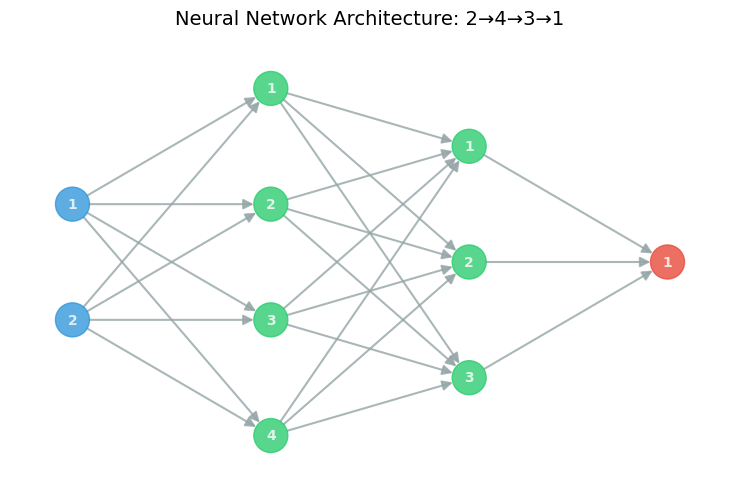

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Risultati dell'inferenza:
Input 1 | Input 2 | Output XOR | Predizione | Decisione del Modello
---------------------------------------------------------------------
   0    |   0   |      0       |   0.0002   |           0
   0    |   1   |      1       |   0.9991   |           1
   1    |   0   |      1       |   0.9991   |           1
   1    |   1   |      0       |   0.0026   |           0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [10]:
#### OK KERAS

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from oli_ai.mnist_lib import *
import random

# === 1. Dati XOR ===
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
outputs = np.array([
    [0],
    [1],
    [1],
    [0]])

# === 2. Rete neurale con 2 hidden layer ===
show_nn_graph([2,4,3,1])
inp = Input(shape=(2,))
h1 = Dense(4, activation='tanh')(inp)        # Primo hidden layer
h2 = Dense(3, activation='sigmoid')(h1)      # Secondo hidden layer con output in [0,1]
out = Dense(1, activation='sigmoid')(h2)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(inputs, outputs, epochs=500, verbose=0)

predictions = model.predict(inputs).ravel()
print("\nRisultati dell'inferenza:")
print("Input 1 | Input 2 | Output XOR | Predizione | Decisione del Modello")
print("---------------------------------------------------------------------")
for i in range(len(inputs)):
    x1, x2 = inputs[i]
    label = int(outputs[i][0])
    pred = predictions[i]
    decision = int(round(pred))
    print(f"   {x1:.0f}    |   {x2:.0f}   |      {label}       |   {pred:.4f}   |           {decision}")

show_xor_3d(model, h1,h2,inputs,outputs)


In [5]:
predictions = model.predict(inputs).ravel()
print("\nRisultati dell'inferenza:")
print("Input 1 | Input 2 | Output XOR | Predizione | Decisione del Modello")
print("---------------------------------------------------------------------")
for i in range(len(inputs)):
    x1, x2 = inputs[i]
    label = int(outputs[i][0])
    pred = predictions[i]
    decision = int(round(pred))
    print(f"   {x1:.0f}    |   {x2:.0f}   |      {label}       |   {pred:.4f}   |           {decision}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Risultati dell'inferenza:
Input 1 | Input 2 | Output XOR | Predizione | Decisione del Modello
---------------------------------------------------------------------
   0    |   0   |      0       |   0.0013   |           0
   0    |   1   |      1       |   0.9990   |           1
   1    |   0   |      1       |   0.9990   |           1
   1    |   1   |      0       |   0.0013   |           0


In [6]:
import numpy as np
import plotly.graph_objects as go
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# === 1. Dati XOR ===
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# === 2. Modello XOR ===
inp = Input(shape=(2,))
hidden = Dense(4, activation='relu')(inp)
out = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(inputs, outputs, epochs=200, verbose=0)

# === 3. Attivazioni hidden layer ===
hidden_model = Model(inputs=model.input, outputs=hidden)
hidden_activations = hidden_model.predict(inputs)

# === 4. Seleziona il neurone più separante (Fisher score) ===
best_index = 0
best_score = -np.inf
for i in range(hidden_activations.shape[1]):
    z = hidden_activations[:, i]
    z0 = z[outputs[:, 0] == 0]
    z1 = z[outputs[:, 0] == 1]
    intra = np.std(z0)**2 + np.std(z1)**2
    inter = (np.mean(z0) - np.mean(z1))**2
    score = inter / (intra + 1e-6)
    if score > best_score:
        best_score = score
        best_index = i

# === 5. Prepara i dati per il plot 3D ===
z_vals = hidden_activations[:, best_index]
data_3d = np.hstack([inputs, z_vals.reshape(-1, 1)])

# === 6. Plot 3D con Plotly ===
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data_3d[:, 0],
    y=data_3d[:, 1],
    z=data_3d[:, 2],
    mode='markers+text',
    marker=dict(
        size=14,
        color=outputs.ravel(),
        colorscale='Viridis',
        opacity=1.0,
        symbol='circle',
        line=dict(color='black', width=1)
    ),
    text=[f"({x[0]},{x[1]})" for x in inputs],
    textposition="top center",
    textfont=dict(size=12, color='black'),
    hovertext=[
        f"Input: ({x[0]}, {x[1]})<br>Output XOR: {y[0]}<br>Attivazione Neurone: {z:.4f}"
        for x, y, z in zip(inputs, outputs, data_3d[:, 2])
    ],
    hoverinfo="text",
    name='XOR Points'
))

fig.update_layout(
    title=dict(
        text='Visualizzazione 3D del Problema XOR con Attivazione del Neurone Nascosto',
        font=dict(size=20)
    ),
    scene=dict(
        xaxis=dict(
            title='Input 1 (X)',
            range=[-0.1, 1.2],
            tickvals=[0, 1],
            showbackground=True,
            backgroundcolor='rgb(255, 230, 230)',
            gridcolor='red',
        ),
        yaxis=dict(
            title='Input 2 (Y)',
            range=[-0.1, 1.2],
            tickvals=[0, 1],
            showbackground=True,
            backgroundcolor='rgb(230, 255, 230)',
            gridcolor='green',
        ),
        zaxis=dict(
            title=f'Attivazione Neurone {best_index} (Z)',
            range=[-0.1, max(data_3d[:, 2]) + 0.2],
            showbackground=True,
            backgroundcolor='rgb(230, 230, 255)',
            gridcolor='blue',
        ),
        camera=dict(eye=dict(x=1.8, y=1.8, z=1.2))
    ),
    height=700,
    width=900,
    margin=dict(l=0, r=0, b=0, t=40, pad=100),
)

fig.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [7]:
hidden_activations[:, best_index]


array([0.0000000e+00, 2.2929666e+00, 0.0000000e+00, 7.7977777e-04],
      dtype=float32)